In [4]:
documents = [
    "This is a list which containing sample documents.",
    "Keywords are important for keyword-based search.",
    "Document analysis involves extracting keywords.",
    "Keyword-based search relies on sparse embeddings.",
    "Understanding document structure aids in keyword extraction.",
    "Efficient keyword extraction enhances search accuracy.",
    "Semantic similarity improves document retrieval performance.",
    "Machine learning algorithms can optimize keyword extraction methods."
]
     

In [ ]:
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI()

In [ ]:
from langchain_openai import AzureOpenAIEmbeddings
embeddings = AzureOpenAIEmbeddings()

In [7]:
document_embeddings = embeddings.embed_documents(documents)
document_embeddings

[[0.009817002341151237,
  -0.0016921521164476871,
  -0.03533784672617912,
  0.026167474687099457,
  -0.01032926607877016,
  0.042761482298374176,
  0.014670917764306068,
  0.04494490474462509,
  -0.006739216390997171,
  0.02175024338066578,
  0.025126149877905846,
  -0.024605488404631615,
  -0.004681760910898447,
  -0.019230909645557404,
  -0.017988039180636406,
  -0.0327177420258522,
  -0.017467377707362175,
  -0.034800391644239426,
  0.029358630999922752,
  -0.01876063458621502,
  -0.00026243054890073836,
  0.02077610231935978,
  -0.00921236164867878,
  0.05196544900536537,
  0.017836879938840866,
  0.03197873756289482,
  0.0076503753662109375,
  -0.019550025463104248,
  -0.005101650021970272,
  0.020389804616570473,
  -0.0029098298400640488,
  0.015418319962918758,
  -0.004727948922663927,
  -0.04024215042591095,
  0.013226499781012535,
  0.003268834901973605,
  0.046658050268888474,
  0.04947970435023308,
  0.00825501512736082,
  -0.0399734228849411,
  0.028938740491867065,
  -0.01

In [8]:
len(document_embeddings)

8

In [9]:
query = "Natural language processing techniques enhance keyword extraction efficiency."

In [10]:
query_embedding = embeddings.embed_query(query)
len(query_embedding)


3072

In [11]:
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
similarities = cosine_similarity(np.array([query_embedding]), document_embeddings)
similarities

array([[0.13121097, 0.51468096, 0.60150243, 0.4419595 , 0.60385098,
        0.77089837, 0.44234505, 0.73166739]])

In [13]:
most_similar_index = np.argmax(similarities)
most_similar_index

np.int64(5)

In [14]:
most_similar_document = documents[most_similar_index]
most_similar_document

'Efficient keyword extraction enhances search accuracy.'

In [15]:
query

'Natural language processing techniques enhance keyword extraction efficiency.'

In [16]:
similarity_score = similarities[0][most_similar_index]
similarity_score

np.float64(0.7708983734028095)

In [17]:
sorted_indices = np.argsort(similarities[0])[::-1]
sorted_indices

array([5, 7, 4, 2, 1, 6, 3, 0])

In [18]:
ranked_documents = [(documents[i], similarities[0][i]) for i in sorted_indices]
ranked_documents  

[('Efficient keyword extraction enhances search accuracy.',
  np.float64(0.7708983734028095)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float64(0.731667394032085)),
 ('Understanding document structure aids in keyword extraction.',
  np.float64(0.6038509817881803)),
 ('Document analysis involves extracting keywords.',
  np.float64(0.6015024255929723)),
 ('Keywords are important for keyword-based search.',
  np.float64(0.5146809604251245)),
 ('Semantic similarity improves document retrieval performance.',
  np.float64(0.44234505347742115)),
 ('Keyword-based search relies on sparse embeddings.',
  np.float64(0.44195949785529653)),
 ('This is a list which containing sample documents.',
  np.float64(0.13121096614197858))]

Vector Search or Similarity Search

In [19]:
print("Ranked Documents:")
for rank, (document, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")
     

Ranked Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.7708983734028095
Rank 2: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.731667394032085
Rank 3: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.6038509817881803
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.6015024255929723
Rank 5: Document - 'Keywords are important for keyword-based search.', Similarity Score - 0.5146809604251245
Rank 6: Document - 'Semantic similarity improves document retrieval performance.', Similarity Score - 0.44234505347742115
Rank 7: Document - 'Keyword-based search relies on sparse embeddings.', Similarity Score - 0.44195949785529653
Rank 8: Document - 'This is a list which containing sample documents.', Similarity Score - 0.13121096614197858


In [20]:
print("Top 4 Documents:")
for rank, (document, similarity) in enumerate(ranked_documents[:4], start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")
   

Top 4 Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.7708983734028095
Rank 2: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.731667394032085
Rank 3: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.6038509817881803
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.6015024255929723


In [21]:
!pip install rank_bm25


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Reranking
#It works on the keyword or token level. 
from rank_bm25 import BM25Okapi
top_4_documents = [doc[0] for doc in ranked_documents[:4]]

top_4_documents

['Efficient keyword extraction enhances search accuracy.',
 'Machine learning algorithms can optimize keyword extraction methods.',
 'Understanding document structure aids in keyword extraction.',
 'Document analysis involves extracting keywords.']

In [23]:
tokenized_top_4_documents = [doc.split() for doc in top_4_documents]
tokenized_top_4_documents
#Tokenization

[['Efficient', 'keyword', 'extraction', 'enhances', 'search', 'accuracy.'],
 ['Machine',
  'learning',
  'algorithms',
  'can',
  'optimize',
  'keyword',
  'extraction',
  'methods.'],
 ['Understanding',
  'document',
  'structure',
  'aids',
  'in',
  'keyword',
  'extraction.'],
 ['Document', 'analysis', 'involves', 'extracting', 'keywords.']]

In [24]:
tokenized_query = query.split()
tokenized_query

['Natural',
 'language',
 'processing',
 'techniques',
 'enhance',
 'keyword',
 'extraction',
 'efficiency.']

In [25]:
bm25=BM25Okapi(tokenized_top_4_documents)
bm25

In [26]:

bm25_scores = bm25.get_scores(tokenized_query)
bm25_scores
#This scores shows much the query is relevent to the document. 


array([0.1907998 , 0.16686672, 0.17803252, 0.        ])

In [27]:
sorted_indices2 = np.argsort(bm25_scores)[::-1]
sorted_indices2

array([0, 2, 1, 3])

In [28]:
reranked_documents = [(top_4_documents[i], bm25_scores[i]) for i in sorted_indices2]
reranked_documents

[('Efficient keyword extraction enhances search accuracy.',
  np.float64(0.19079979534096053)),
 ('Understanding document structure aids in keyword extraction.',
  np.float64(0.1780325227902643)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float64(0.1668667199671815)),
 ('Document analysis involves extracting keywords.', np.float64(0.0))]

In [29]:
# Rerank Document 
print("Rerank of top 4 Documents:")
for rank, (document, similarity) in enumerate(reranked_documents, start=1):
    print(f"Rank {rank}: Document - '{document}', Similarity Score - {similarity}")
     

Rerank of top 4 Documents:
Rank 1: Document - 'Efficient keyword extraction enhances search accuracy.', Similarity Score - 0.19079979534096053
Rank 2: Document - 'Understanding document structure aids in keyword extraction.', Similarity Score - 0.1780325227902643
Rank 3: Document - 'Machine learning algorithms can optimize keyword extraction methods.', Similarity Score - 0.1668667199671815
Rank 4: Document - 'Document analysis involves extracting keywords.', Similarity Score - 0.0


In [30]:
ranked_documents[:4]

[('Efficient keyword extraction enhances search accuracy.',
  np.float64(0.7708983734028095)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float64(0.731667394032085)),
 ('Understanding document structure aids in keyword extraction.',
  np.float64(0.6038509817881803)),
 ('Document analysis involves extracting keywords.',
  np.float64(0.6015024255929723))]

RAG-04 Lecture


In [43]:
#Cross Encoder.  
from sentence_transformers import CrossEncoder
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')


In [49]:
print(top_4_documents)
print(query)

['Efficient keyword extraction enhances search accuracy.', 'Machine learning algorithms can optimize keyword extraction methods.', 'Understanding document structure aids in keyword extraction.', 'Document analysis involves extracting keywords.']
Natural language processing techniques enhance keyword extraction efficiency.


In [50]:
pairs = []
for doc in top_4_documents:
    pairs.append([query, doc])
pairs

[['Natural language processing techniques enhance keyword extraction efficiency.',
  'Efficient keyword extraction enhances search accuracy.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Machine learning algorithms can optimize keyword extraction methods.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Understanding document structure aids in keyword extraction.'],
 ['Natural language processing techniques enhance keyword extraction efficiency.',
  'Document analysis involves extracting keywords.']]

In [51]:
scores = cross_encoder.predict(pairs)
scores

array([ 3.1378736,  0.8421648, -2.9193008, -2.8781905], dtype=float32)

In [52]:
scored_docs = zip(scores, top_4_documents)
scored_docs

In [53]:
reranked_document_cross_encoder = sorted(scored_docs, reverse=True)
reranked_document_cross_encoder

[(np.float32(3.1378736),
  'Efficient keyword extraction enhances search accuracy.'),
 (np.float32(0.8421648),
  'Machine learning algorithms can optimize keyword extraction methods.'),
 (np.float32(-2.8781905), 'Document analysis involves extracting keywords.'),
 (np.float32(-2.9193008),
  'Understanding document structure aids in keyword extraction.')]

In [54]:
#BM25 
reranked_documents

[('Efficient keyword extraction enhances search accuracy.',
  np.float64(0.19079979534096053)),
 ('Understanding document structure aids in keyword extraction.',
  np.float64(0.1780325227902643)),
 ('Machine learning algorithms can optimize keyword extraction methods.',
  np.float64(0.1668667199671815)),
 ('Document analysis involves extracting keywords.', np.float64(0.0))]

In [36]:
!pip install cohere 



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cohere
co = cohere.Client("")
top_4_documents

['Efficient keyword extraction enhances search accuracy.',
 'Machine learning algorithms can optimize keyword extraction methods.',
 'Understanding document structure aids in keyword extraction.',
 'Document analysis involves extracting keywords.']

In [38]:
response = co.rerank(
    model="rerank-english-v3.0",
    query="Natural language processing techniques enhance keyword extraction efficiency.",
    documents=top_4_documents,
    return_documents=True
)

In [39]:
print(response)


id='9c6a6a66-2a50-4af1-a268-8ad0d6cd969d' results=[RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Efficient keyword extraction enhances search accuracy.'), index=0, relevance_score=0.99411184), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Machine learning algorithms can optimize keyword extraction methods.'), index=1, relevance_score=0.9129032), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Understanding document structure aids in keyword extraction.'), index=2, relevance_score=0.32885265), RerankResponseResultsItem(document=RerankResponseResultsItemDocument(text='Document analysis involves extracting keywords.'), index=3, relevance_score=0.02865267)] meta=ApiMeta(api_version=ApiMetaApiVersion(version='1', is_deprecated=None, is_experimental=None), billed_units=ApiMetaBilledUnits(images=None, input_tokens=None, output_tokens=None, search_units=1.0, classifications=None), tokens=None, warnings=None)


In [40]:
response.results[0].document.text

'Efficient keyword extraction enhances search accuracy.'

In [41]:
response.results[0].relevance_score


0.99411184

In [42]:
for i in range(4):
  print(f'text: {response.results[i].document.text} score: {response.results[i].relevance_score}')
     

text: Efficient keyword extraction enhances search accuracy. score: 0.99411184
text: Machine learning algorithms can optimize keyword extraction methods. score: 0.9129032
text: Understanding document structure aids in keyword extraction. score: 0.32885265
text: Document analysis involves extracting keywords. score: 0.02865267


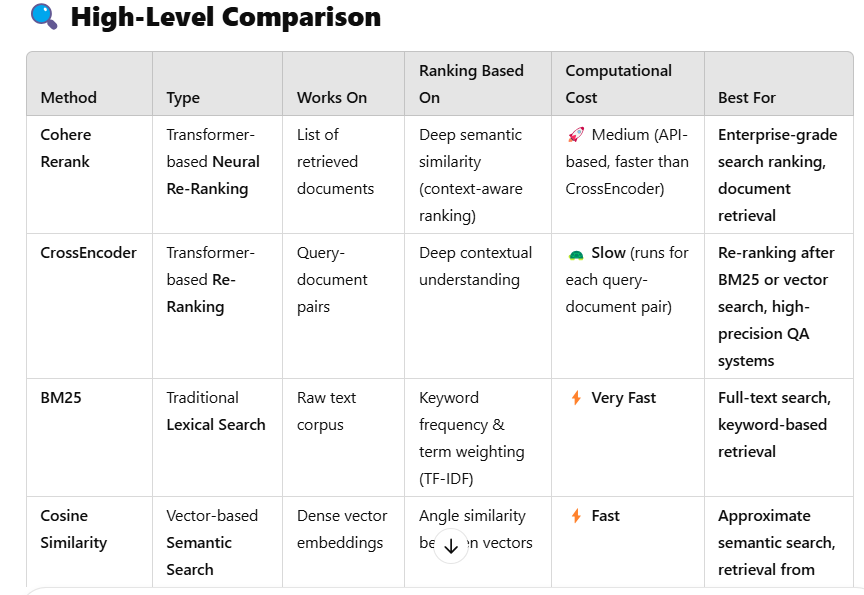

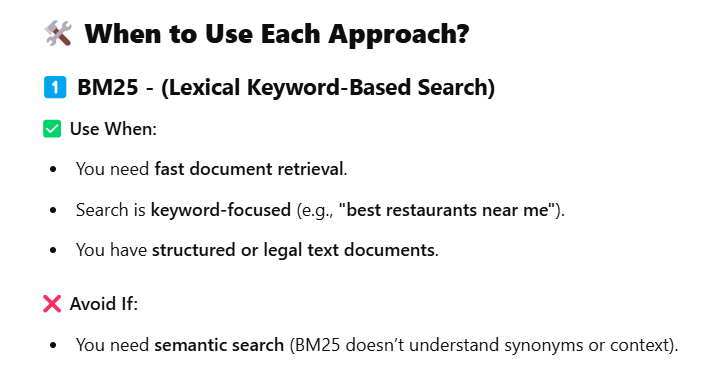

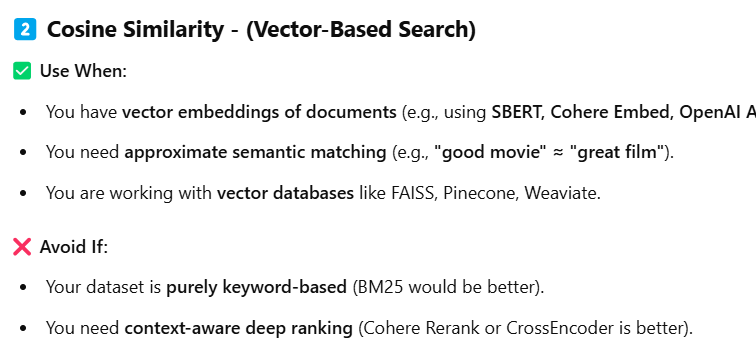

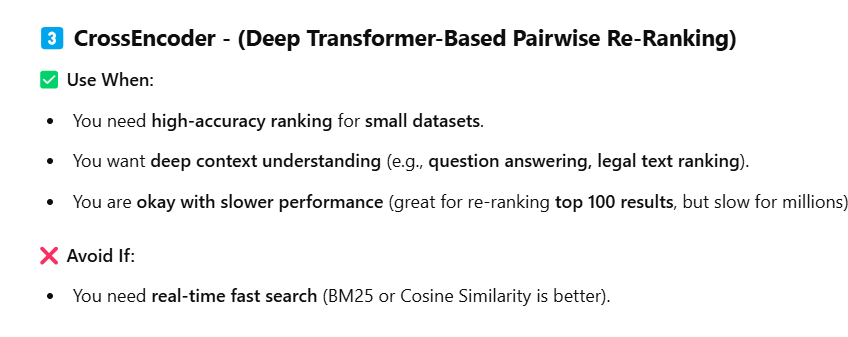

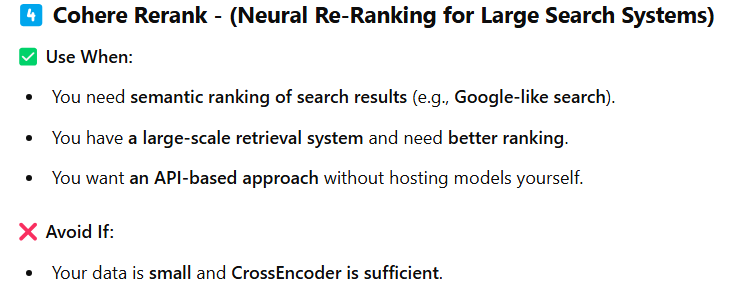